In [4]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
style.use('ggplot')

In [3]:
df = quandl.get('WIKI/GOOGL')

In [4]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [249]:
#Did features  - функции
#high lower procent
df['HL_PCT']     = (df["Adj. High"] - df["Adj. Low"]) / df["Adj. Low"] * 100.0
df['PTC_change'] = (df["Adj. Close"] - df["Adj. Open"]) / df["Adj. Open"] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PTC_change', 'Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PTC_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


In [250]:
#Define label
forecast_column = 'Adj. Close'    #forecast - прогноз 
df.fillna(-99999, inplace=True)   #ML don't read nan date, so we replace in smt

In [210]:
math.ceil(0.01 * 14)
#type = int

1

In [251]:
#Try it prediction 10% dataframe
forecast_out = math.ceil(0.1 * len(df))
#math.ceil() – округление до ближайшего большего числа.

In [252]:
#.shift move, minus moved in down 
df['label'] = df[forecast_column].shift(-forecast_out)
#На место сдвинутых образуется nan, поэтому мы заменяем его

In [153]:
df.tail()

,Adj. Close,HL_PCT,PTC_change,Adj. Volume,label
Date,,,,,
2016-11-04,781.10,2.266615,1.270582,1970603.0,1094.00
2016-11-07,802.03,1.526044,0.890622,1992570.0,1053.15
2016-11-08,811.98,2.053475,1.240602,1769069.0,1026.55
2016-11-09,805.59,2.484107,0.468927,3098510.0,1054.09
2016-11-10,780.29,5.444984,-3.667901,5909609.0,1006.94


In [13]:
df.head()

,Adj. Close,HL_PCT,PTC_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,214.005615
2004-08-20,54.322689,8.537313,7.227007,22834300.0,210.725489
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,3.966115,1.183658,9188600.0,223.309335


In [253]:
#Save in asix = 1(x) столбец Х так же и с y
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

In [254]:
X.shape, y.shape

((3081, 4), (3081,))

In [255]:
#First two - features, Second two - labels
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
#test_size = 0.2 = 20% от нашей даты будет обучаться 

In [256]:
##ALL IN COMMENT CAUSE WE USED pickle who save our prediction 
##Minus one cause we want used all power of Computer
# clf = LinearRegression(n_jobs=-1)

In [257]:
# clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [258]:
# #We can save our prediction to avoid retraing date and 
# #if we have big date its not need  =  to avoid - во избежание 
# with open('linearregression.pickle', 'wb') as f:
#     pickle.dump(clf, f)

In [272]:
#load date 
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [273]:
#accuracy = точность предсказания
accuracy =  clf.score(X_test, y_test)
accuracy

0.8687532649214689

In [260]:
X_train_example = np.array([[ 1.0, -1.0,  2.0], 
                            [ 2.1,  0.0,  0.0],
                            [ 0.0,  1.0, -1.0]])
X_scale = preprocessing.scale(X_train_example)
X_scale

array([[-0.0388661 , -1.22474487,  1.33630621],
       [ 1.24371532,  0.        , -0.26726124],
       [-1.20484922,  1.22474487, -1.06904497]])

In [261]:
#Используем новую модель классификации
clf2 = svm.SVR()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.7055679171432654

In [274]:
forecast_set = clf.predict(X_lately)

In [275]:
#forecast_out следующие дни предсказания
print(forecast_set, accuracy, forecast_out)

[ 967.82495517  960.45882668  976.15197166  985.11575039  985.51935475
  978.60674363  984.92982003  984.91161394  983.83628497  975.08505325
  995.52820006  991.30242524  980.20317357  972.12400189  960.87075425
  979.42654938  975.48204439 1000.47498947  998.34983242 1016.52272698
 1010.1681     1023.65308334 1026.37884852 1023.14080942 1014.98495315
 1020.62004417 1018.38430025 1018.90674794 1011.28984619 1010.07195943
 1016.34456059 1009.86033131 1005.25958609  996.84783689 1016.99112409
 1012.23539665 1017.76922116 1040.66439047 1035.89966362 1032.43082409
 1039.04308059 1039.38042527 1037.45177173 1034.54506258 1035.88903325
 1032.84589552 1033.57992811 1063.2471549  1063.5553347  1074.48333351
 1071.68331913 1068.76336852 1035.5329353  1027.37321703 1022.60607149
 1027.89840568 1025.1917604  1028.50580134 1038.04952162 1039.59145201
 1036.74845587 1043.4986242  1047.7017724  1049.5170438  1045.5945167
 1052.00240437 1058.42250972 1060.62056323 1064.49915314 1066.40024206
 1058.4

In [276]:
# entire filled in nan = entire - все/полностью
df['forecast'] = np.nan

In [277]:
df.head()

,Adj. Close,HL_PCT,PTC_change,Adj. Volume,label,forecast
Date,,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,214.005615,NaN
2004-08-20,54.322689,8.537313,7.227007,22834300.0,210.725489,NaN
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,208.072299,NaN
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,218.288837,NaN
2004-08-25,53.164113,3.966115,1.183658,9188600.0,223.309335,NaN


In [278]:
df.iloc[-1] # [-1] last row of data frame 
# .name - обращаемся к кокретной строке 

Adj. Close    NaN
HL_PCT        NaN
PTC_change    NaN
Adj. Volume   NaN
label         NaN
forecast      NaN
Name: 2017-10-19 02:00:00, dtype: float64

In [279]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp() #timestamp() convert all date to seconds
one_day = 86400 # 1 day in sec 
next_unix = last_unix + one_day 

In [280]:
#forecast_set is array predictions next days 
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix) # convert in POSIX time
    next_unix += one_day 
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)- 1)] + [i]
#Заполняем  forecast nan (range(len(df.columns) - 1))пока дойдет до предикшина на след дни(+[i]) 
#Если этот день существует заполняет его предишеном, если нет то нан 

In [281]:
df['forecast'].head()

Date
2004-08-19   NaN
2004-08-20   NaN
2004-08-23   NaN
2004-08-24   NaN
2004-08-25   NaN
Name: forecast, dtype: float64

In [282]:
df['forecast'].tail()

Date
2018-09-23 04:00:00    1373.011952
2018-09-24 04:00:00    1329.430898
2018-09-25 04:00:00    1303.389980
2018-09-26 04:00:00    1342.294920
2018-09-27 04:00:00    1296.569008
Name: forecast, dtype: float64

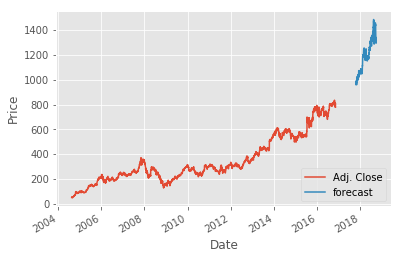

In [283]:
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
#prediction on the 343 date (look at forecast_out) 